# Low Birth Rate Data Exploration and Experimenting Linear Regression, KNN, Decision Tree, and K-mean Algorithms 
# Borga Usifo - busifo@iu.edu

# Linear Regression Model Creation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go 



In [2]:
low_birth_train = pd.read_csv('lbr-train.csv')
low_birth_test = pd.read_csv('lbr-test.csv')


In [3]:
# Describing the data 
low_birth_train.describe()

,Unnamed: 0,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,95.721854,120.741722,0.317881,23.423841,129.172185,1.847682,0.370861,0.192053,0.059603,0.145695,0.847682,2946.132450
std,56.025965,63.379120,0.467202,5.454585,29.140067,0.921942,0.484643,0.472091,0.237537,0.353975,1.024684,717.087346
min,1.000000,10.000000,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1021.000000
25%,48.000000,67.500000,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2412.000000
50%,99.000000,116.000000,0.000000,23.000000,120.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2920.000000
75%,143.500000,178.000000,1.000000,26.500000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3515.500000
max,189.000000,226.000000,1.000000,45.000000,241.000000,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4990.000000


In [4]:
# Recursive Feature Elemination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = low_birth_train.values
X = array[:,0:11]
Y = array[:,11]
# Feature extraction 
model = LogisticRegression()
rfe =RFE(model, 3)
fit_1 = rfe.fit(X,Y)
print('Number of features: {}'.format(fit_1.n_features_))
print('Selected Features: {}'.format(fit_1.support_))
print('Feature Ranking: {}'.format(fit_1.ranking_))

Number of features: 3
Selected Features: [False False False False False  True  True False False False  True]
Feature Ranking: [7 6 9 5 8 1 1 2 4 3 1]


In [5]:
# Feature Selection with Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summirize scores
np.set_printoptions(precision= 3)
print(fit.scores_)
features = fit.transform(X)

# Summarize selected features
print(features[0:7, :])

[ 4918.426  4989.967   103.      146.163   762.559    52.947    72.979
   146.299   125.222    99.258   150.799]
[[120 216  95   1]
 [156  37 130   0]
 [ 77 169 140   1]
 [140  20 165   1]
 [124 220 129   0]
 [170  57 110   0]
 [164  49 148   0]]


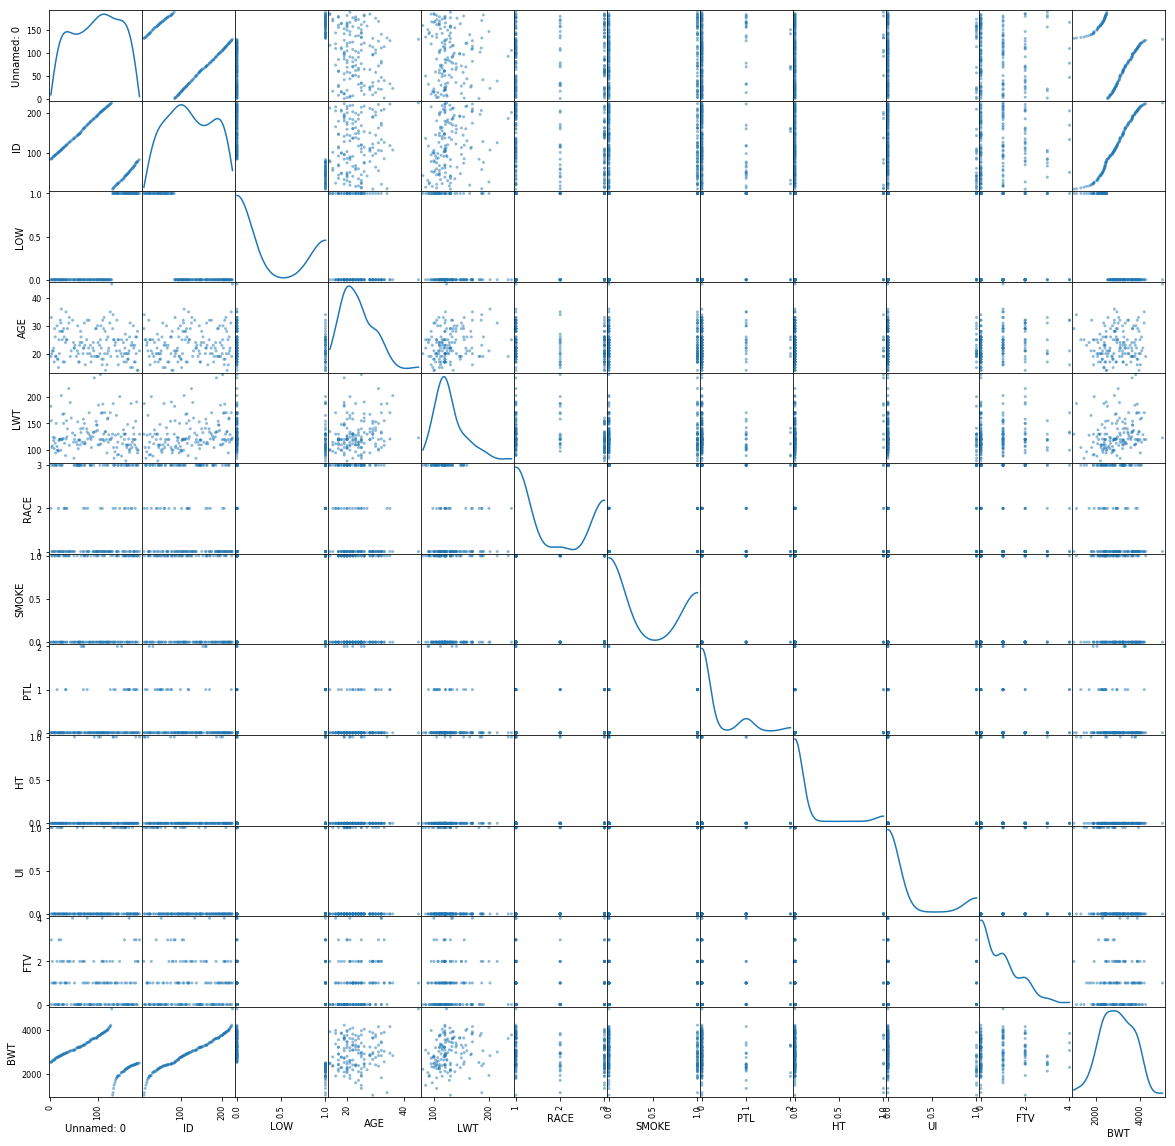

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(low_birth_train, alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

        As we can see from the chisquare calculation and the scatter matrix that features that most correlated with the BWT is Unnamed, ID, and LWT. I will use this features the train my dataset in Linear Regression model.

In [7]:
 # Dropping the feautures that are not needed from training and testin data
X_train = low_birth_train.drop(['LOW', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV', 'BWT'],
                                  axis=1)
X_test = low_birth_test.drop(['LOW', 'RACE', 'SMOKE',
                              'PTL', 'HT', 'UI', 'FTV', 'BWT'], axis = 1)
Y_train = low_birth_train.BWT
Y_test = low_birth_test.BWT

In [8]:
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(38, 4)
(151, 4)
(151,)
(38,)


In [9]:
# Importing Linear Regression Model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fitting the data into Linear Model
lr.fit(X_train, Y_train)

# Making predictions with the testing data 
pred_y_pred = lr.predict(X_test)

# Getting the accuracy of the Linear Regression Model
print('Accuracy on the training subset: {:.3f}'.format(lr.score(X_train, 
                                                                  Y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(lr.score(X_test, 
                                                                  Y_test)))

Accuracy on the training subset: 0.969
Accuracy on the testing subset: 0.946


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, pred_y_pred))

#Explained variance score: 1 is perfect prediction
print('Variance socre: %2f' % r2_score(Y_test, pred_y_pred))

Coefficients: 
 [  0.272  11.254   1.821  -0.639]
Mean squared error: 32576.51
Variance socre: 0.945666


# K Means In Scikit Learn

In [11]:
'''I will remove the one of the variable where the correlation between 
them strong in our case I will remove Unnamed varibale '''

k_mean_df = low_birth_train.drop('Unnamed: 0', axis = 1)

# Turning the data to numpy array for fitting into clustering 
numpy_data = k_mean_df.as_matrix()

In [12]:
# Importing the Kmean clustering 
from sklearn.cluster import KMeans

# Creating the Kmean clustering object with 3 classess 
cluster = KMeans(n_clusters=3, max_iter = 1000)

In [13]:
# Fitting the data into the cluster 
cluster.fit(numpy_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Checking the centroid means for clustering 
cluster.cluster_centers_

array([[  1.992e+02,   1.110e-16,   2.393e+01,   1.399e+02,   1.523e+00,
          2.500e-01,   4.545e-02,   6.818e-02,   2.273e-02,   8.409e-01,
          3.806e+03],
       [  4.884e+01,   9.412e-01,   2.233e+01,   1.228e+02,   2.020e+00,
          4.902e-01,   3.333e-01,   9.804e-02,   2.745e-01,   8.039e-01,
          2.156e+03],
       [  1.246e+02,   0.000e+00,   2.402e+01,   1.266e+02,   1.946e+00,
          3.571e-01,   1.786e-01,   1.786e-02,   1.250e-01,   8.929e-01,
          2.990e+03]])

In [15]:
# Merging K-Mean cluster label with the data
k_mean_df['cluster'] = cluster.labels_

In [16]:
# Showing the data first 5 columns 
k_mean_df.head()

,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT,cluster
0,216,0,16,95,3,0,0,0,0,1,3997,0
1,37,1,17,130,3,1,1,0,1,0,2125,1
2,169,0,25,140,1,0,0,0,0,1,3416,0
3,20,1,21,165,1,1,0,1,0,1,1790,1
4,220,0,22,129,1,0,0,0,0,0,4111,0


In [17]:
# Principal component seperation to create a 2-dimensional picture 
from sklearn.decomposition import PCA
cols = k_mean_df.columns[1:]
pca = PCA(n_components=2)
k_mean_df['x'] = pca.fit_transform(k_mean_df[cols])[:,0]
k_mean_df['y'] = pca.fit_transform(k_mean_df[cols])[:,1]

In [18]:
id_cluster = k_mean_df[['ID', 'cluster', 'x', 'y']]

In [19]:
id_cluster.tail()

,ID,cluster,x,y
146,107,2,-111.373655,-27.907312
147,106,2,-111.192370,-6.899988
148,224,0,1291.737196,-20.480633
149,65,1,-535.996949,17.694399
150,185,0,667.876697,-1.915982


In [20]:
# Creating scatter plot for visualizaton of clustering 
trace0 = go.Scatter(x= id_cluster[id_cluster.cluster ==0]['x'],
                   y = id_cluster[id_cluster.cluster ==0]['y'],
                   name = 'Cluster 1',
                   mode = 'markers',
                   marker = dict(size=10,
                                color = 'rgba(15, 152, 152, 0.5)',
                                line = dict(width = 1, color = 'rgb(0, 0, 0)')))
trace1 = go.Scatter(x= id_cluster[id_cluster.cluster ==1]['x'],
                   y = id_cluster[id_cluster.cluster ==1]['y'],
                   name = 'Cluster 2',
                   mode = 'markers',
                   marker = dict(size=10,
                                color = 'rgba(180, 18, 180, 0.5)',
                                line = dict(width = 1, color = 'rgb(0, 0, 0)')))
trace2 = go.Scatter(x= id_cluster[id_cluster.cluster ==2]['x'],
                   y = id_cluster[id_cluster.cluster ==2]['y'],
                   name = 'Cluster 3',
                   mode = 'markers',
                   marker = dict(size=10,
                                color = 'rgba(228, 51, 51, 0.8)',
                                line = dict(width = 1, color = 'rgb(0, 0, 0)')))
data = [trace0, trace1, trace2]
py.iplot(data, filename='scatter-plot-for-k-means-clustering')


# KNN Algorithm 

In [21]:
# Preparing data. Dropping Unnamed, ID and LOW columns. 
knn_data = low_birth_train
X_knn = low_birth_train.drop(['Unnamed: 0', 'ID', 
                                'LOW'], axis=1)
# Label dataset 
Y_knn = low_birth_train[['LOW']]

# Getting the testing data 
X_knn_test = low_birth_test.drop(['Unnamed: 0', 'ID', 'LOW'], axis = 1)
Y_knn_test = low_birth_test[['LOW']]
# Turning testing data into nummpy array

X_knn_test_matrix = X_knn_test.as_matrix()
Y_knn_test_matrix = Y_knn_test.as_matrix()


In [22]:
# Putting data to numpy array 

X_knn_matrix = X_knn.as_matrix()
Y_knn_matrix = Y_knn.as_matrix()

In [23]:
# Importing required KNN algorithm from sklearn and fitting the data 
from sklearn.neighbors import KNeighborsRegressor

# Creating the classifier object
clf_1 = KNeighborsRegressor()

# Fitting the data 
clf_1.fit(X_knn_matrix, Y_knn_matrix)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [24]:
# Getting the accuracy of the classifier 
print('Accuracy of KNN n-5, on the trainig set: {:.3f}'.format(clf_1.score(X_knn_matrix, Y_knn_matrix)))
print('Accuracy of KNN n-5, on the testing set: {:.3f}'.format(clf_1.score(X_knn_test_matrix, Y_knn_test_matrix)))

Accuracy of KNN n-5, on the trainig set: 0.988
Accuracy of KNN n-5, on the testing set: 0.995


In [25]:
# Making the predictions 
predicted_knn = clf_1.predict(X_knn_test_matrix)

predicted_knn_df = pd.DataFrame(predicted_knn, columns=['prediction'])
#from sklearn.metrics import classification_report
#print(classification_report(y_expect, y_pred))

low_birth_test['prediction'] = predicted_knn_df

low_birth_test.tail()


,Unnamed: 0,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT,prediction
33,152,33,1,19,102,1,0,0,0,0,2,2082,1.0
34,154,35,1,26,117,1,1,1,0,0,0,2084,1.0
35,172,60,1,20,122,2,1,0,0,0,0,2381,1.0
36,187,82,1,23,94,3,1,0,0,0,0,2495,1.0
37,188,83,1,17,142,2,0,0,1,0,0,2495,0.8


We can clearly see our predictions on LOW, and prediction columns are quite accurate for this dataset when using KNN algorithm. 

# Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Training data preperation
decision_tree_data = low_birth_train
X_decision_train = low_birth_train.drop('LOW', axis = 1)
Y_decision_train = low_birth_train[['LOW']]

# Testing data preperation

decision_tree_test_data = low_birth_test
X_decision_test = low_birth_test.drop(['LOW', 'prediction'], axis = 1)
Y_decision_test = low_birth_test[['LOW']]

#Validating the shape of the data on training and testing set 
print(X_decision_test.head())
print(X_decision_train.head())

   Unnamed: 0   ID  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV   BWT
0           5   89   18  107     1      1    0   0   1    0  2600
1          13   98   22   95     3      0    0   1   0    0  2750
2          31  117   17  113     2      0    0   0   0    1  2920
3          37  124   19  138     1      1    0   0   0    2  2977
4          38  125   27  124     1      1    0   0   0    0  2992
   Unnamed: 0   ID  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV   BWT
0         120  216   16   95     3      0    0   0   0    1  3997
1         156   37   17  130     3      1    1   0   1    0  2125
2          77  169   25  140     1      0    0   0   0    1  3416
3         140   20   21  165     1      1    0   1   0    1  1790
4         124  220   22  129     1      0    0   0   0    0  4111


In [27]:
tree = DecisionTreeClassifier()
tree.fit(X_decision_train, Y_decision_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_decision_train, 
                                                                  Y_decision_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_decision_test, 
                                                                  Y_decision_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 1.000
